In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from IPython.display import display, Math
from scipy.optimize import minimize
import astropy.units as u
from astropy.modeling.models import custom_model
from scipy import interpolate
import keras
from scipy.optimize import Bounds
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
import LUCI.LuciFit as lfit
import emcee
import corner


2022-09-08 13:40:51.646053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 13:40:51.646075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


0 10


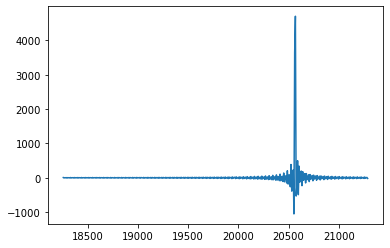

In [2]:
# Read in Data

sigma_info = []
velocity_info = []
res_info = []
spectrum = fits.open('../Data/Reference-Spectrum-R1800-SN2.fits')
header = spectrum[0].header
spec = spectrum[1].data
channel = []
counts = []
for chan in spec:
    channel.append(chan[0])
    counts.append(chan[1])

axis = channel
sky = counts
velocity = header['VELOCITY']
sigma = header['BROADEN']
print(velocity, sigma)
plt.plot(axis, sky)

In [3]:
# Machine Learning Reference Spectrum
ref_spec = fits.open('../ML/Reference-Spectrum-R1800-SN2.fits')[1].data
channel = []
counts = []
for chan in ref_spec:  # Only want SN3 region
    channel.append(chan[0])
    counts.append(np.real(chan[1]))
min_ = np.argmin(np.abs(np.array(channel)-19000))
max_ = np.argmin(np.abs(np.array(channel)-21000))
wavenumbers_syn = channel[min_:max_]

In [4]:
f = interpolate.interp1d(axis, sky, kind='slinear')
sky_corr = (f(wavenumbers_syn))
sky_corr_scale = np.max(sky_corr)
sky_corr = sky_corr/sky_corr_scale
print(sky_corr.shape)

(274,)


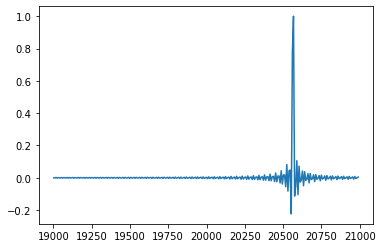

In [5]:
plt.plot(wavenumbers_syn, sky_corr)

In [14]:
fit = lfit.Fit(sky, axis, wavenumbers_syn, 'sincgauss', ['Hbeta','OIII5007','OIII4959'], [1,1,1], [1,1,1],
                keras.models.load_model('../ML/R1800-PREDICTOR-I-SN2'), filter='SN2',
                 bayes_bool=False)
fit_dict = fit.fit()
print(fit_dict['velocities'])
#print(fit_dict['fit_vector'])

[-0.6905693412078752, -0.6905693412231504, -0.6905693411855723]


(20000.0, 21000.0)

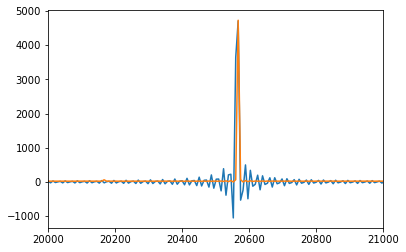

In [15]:
plt.plot(axis, sky)
plt.plot(axis, fit_dict['fit_vector'])
plt.xlim(20000, 21000)

In [16]:
fit_dict['amplitudes']
#fit_dict['continuum']

[4704.599598574071, 26.060048467304767, 39.74903045782659]